In [3]:
# Importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Paired Sample T - Test

The paired sample t-test is a test applied on a sample of paired units or a unit tested in two different situations. In our example, we are going to compare the weights of participants before and after a diet. Using the paired samples t-test will show if the diet has a significant effect on the subjects’ weights or not. This will help us to reject the null hypothesis.

### Null hypothesis

A null hypothesis is a statistical theory suggesting that no statistical relationship exists between given observed variables. In our case it suggests that the diet did not have any effect on the weight of the subjects and instead the variance on their weight is pure accidental.

### Alternative hypothesis
The alternative hypothesis is that the diet worked and it had effect on the participants weights.

### About the database

The database consists of 90 entry or datapoints. Each of the datapoints contains information about age, gender, height, weight before diet, identifier of the diet type and weight before 6 weeks on diet.

Since we are trying that the diet had an effect on the participants weight, we will be utilizing, from the dataset, the weigh before and after the diet.

### Importing, cleaning and fitting the data

In [4]:
# Creating a Dataframe
df = pd.read_csv("Diet.csv")
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,1,0,22,159,58,1,54.2
1,2,0,46,192,60,1,54.0
2,3,0,55,170,64,1,63.3
3,4,0,33,171,64,1,61.1
4,5,0,50,170,65,1,62.2
...,...,...,...,...,...,...,...
85,86,1,40,167,87,3,77.8
86,87,1,51,175,88,3,81.9
87,88,1,25,155,74,3,68.5
88,89,1,36,168,81,3,76.6


The database consists of 90 entry or datapoints. Each of the datapoints contains information about age, gender, height, weight before diet, identifier of the diet type and weight before 6 weeks on diet.

Since we are trying to check if the diet had an effect on the participants weight, we will be utilizing, from the dataset, the weigh before and after the diet. Before we start plotting our data we are going to clean it and check for any empty fields 

In [5]:
# Checking if there is any empty fields
df.isnull().sum()

Person          0
gender          0
Age             0
Height          0
pre.weight      0
Diet            0
weight6weeks    0
dtype: int64

In [6]:
# Converting 'pre.weight' to float
weight_before_diet = df['pre.weight'].astype(float)
weight_after_diet = df['weight6weeks']


In [7]:
# Calculating the difference of weight between before and after the diet and adding it to the df
diff = weight_before_diet - weight_after_diet
df['Weight Difference'] = diff.values
df_diff = df['Weight Difference']
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,Weight Difference
0,1,0,22,159,58,1,54.2,3.8
1,2,0,46,192,60,1,54.0,6.0
2,3,0,55,170,64,1,63.3,0.7
3,4,0,33,171,64,1,61.1,2.9
4,5,0,50,170,65,1,62.2,2.8
...,...,...,...,...,...,...,...,...
85,86,1,40,167,87,3,77.8,9.2
86,87,1,51,175,88,3,81.9,6.1
87,88,1,25,155,74,3,68.5,5.5
88,89,1,36,168,81,3,76.6,4.4


 ## Checking if the data is normally distributed.

Before we start the using a paired sample t-test we need to assume that the data is normally distributed, we can also check that by plotting the data. Below are plots with the data weight of the participants before and after the diet, which is the data that is going to be used on our paired sample t-test.

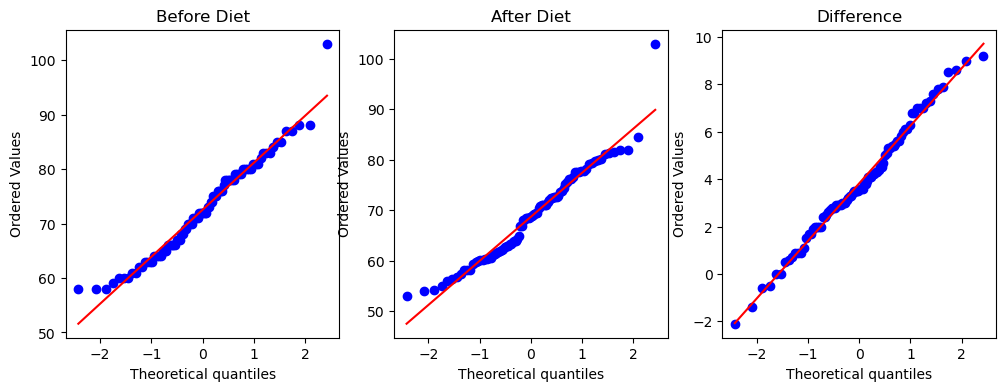

In [18]:

plt.figure(figsize=(12,4))


plt.subplot(1,3,1)
stats.probplot(weight_before_diet,plot=plt)
plt.title('Before Diet')


plt.subplot(1,3,2)
stats.probplot(weight_after_diet,plot=plt)
plt.title('After Diet')

plt.subplot(1,3,3)
stats.probplot(df_diff,plot=plt)
plt.title('Difference')

plt.show()

<Axes: title={'center': 'After Diet'}, xlabel='Weight Difference', ylabel='Count'>

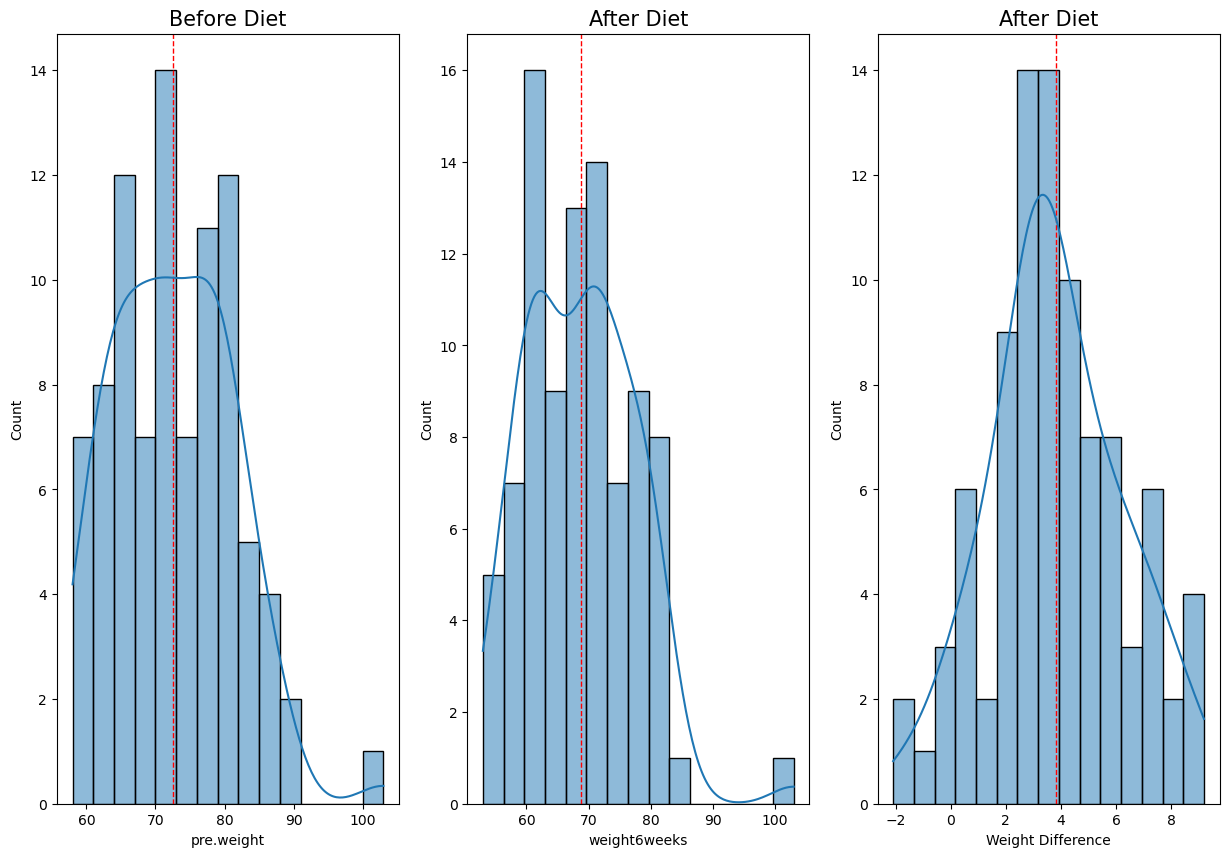

In [27]:
fig, axs = plt.subplots(figsize=(15, 10), ncols=3)

# Weight Before Diet
axs[0].axvline(weight_before_diet.mean(), color='r', linestyle='dashed', linewidth=1)
axs[0].set_title('Before Diet', size=15)
sns.histplot(kde=True, data=weight_before_diet, ax=axs[0], bins = 15)

# Weight After Diet
axs[1].axvline(weight_after_diet.mean(), color='r', linestyle='dashed', linewidth=1)
axs[1].set_title('After Diet', size=15)
sns.histplot(kde=True, data=weight_after_diet, ax=axs[1], bins = 15)

# Difference
axs[2].axvline(df_diff.mean(), color='r', linestyle='dashed', linewidth=1)
axs[2].set_title('After Diet', size=15)
sns.histplot(kde=True, data=df_diff, ax=axs[2], bins = 15)


As we can see on the plots, both the data before and after the diet are normally distributed. 

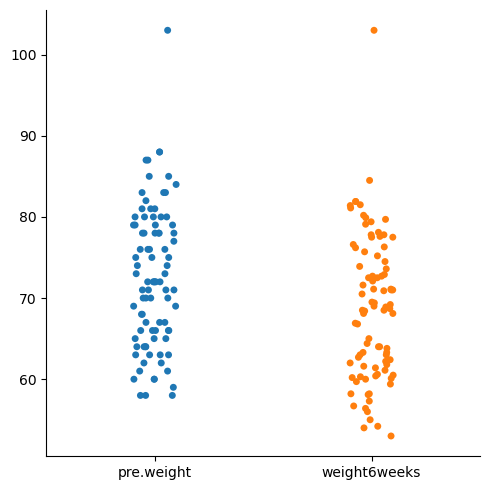

In [10]:
sns.catplot([weight_before_diet, weight_after_diet])

### Comparing the means from before and afte the diet

In [11]:
mean_before_diet = weight_before_diet.mean()
print("Mean of the weights before the diet",mean_before_diet)

Mean of the weights before the diet 72.53333333333333


In [12]:
mean_after_diet = weight_after_diet.mean()
print("Mean of the weights before the diet",mean_after_diet)

Mean of the weights before the diet 68.71555555555555


As we can see above, the mean of the weights after the diet is smaller than before starting the diet, which suggest that the diet worked, and the participants lost weight.

However, only looking at the plots and comparing the means still leave some place to doubt. To clear this doubt and see if we can reject the null hypothesis and show that the diet had effect on the participants weights we are going to perform a paired t-test.

### Paired Samples T-test using Scipy

To perform a t-test on our data we are going to use the Scipy **ttest_rel** function. It takes as mandatory parameter the paired data. In our case it will be the weight of the participants before and after the diet and it uses the standard confidence interval of 0.95 or 95%.

The function returns the **t-statistic value**, the **p value** and the **degree of freedom**.

In [13]:
# paired Sample t-test using Scipy
stats.ttest_rel(weight_before_diet,weight_after_diet )

TtestResult(statistic=15.085037683281275, pvalue=2.9752255651230236e-26, df=89)

As we can see above, the null hypothesis should be rejected since the p value is much smaller than our 0.05 confidence interval. 
This also can be seen in the t value calculated. When using our 0.05 confidence interval and a 89 degrees of freedom and looking for the critical t value in the t-value [table](https://yuppal.people.ysu.edu/econ_3790/t-table.pdf) , we get a critical t-value of 1.987, when looking for a two-tailed value since we want to reject the null hypothesis that there is no significance difference between the values before and after the diet. 

Comparing this value to our calculated t-value of approximately 15.085 we can reject the null hypothesis as the value is significant higher and  falls beyond the critical t-value region.


### Paired Sample t-test value mathematical approach

t = $\Large\frac{\bar{d} - {{d}_0} }{{s_d/\sqrt{n}}}$

https://www.youtube.com/watch?v=JiQR0lHLe74

We can see above the formula for a paired sample t-test, where:
- $\bar{d}$ is the sample mean of the differences between the weights before and after.
- ${{d}_0}$ is the hypothesized population mean difference which in our case will be zero.
- ${s_d}$ is the standard deviation of differences.
- And n is the sample size.


In [12]:
# First, we calculate the difference between the weights before and after the diet
diff = weight_before_diet - weight_after_diet
# Then we calculate the mean of the differences
mean_diff = np.average(diff)
# And also the standard deviation
# Adjusting the degrees of freedom (Ref: https://stackoverflow.com/questions/28405442/calculating-t-statistics-using-scipy-stats)
std_diff = np.std(diff, ddof=1)
#Number of samples
n = 90
# Standard error
std_error = std_diff/np.sqrt(n)

In [13]:
# T Value formula
t_value = mean_diff / (std_error)
t_value

15.085037683281275

### Conclusion

Taking into the account the tests above. We can reject the null hypothesis and confirm that are significantly differences between the weights before and after the diet and can confirm that the diet program was effective on reducing the participants’ weights. 

This conclusion can be drawn when looking at the P and T values from our performed paired sample t-test. The small p-value and the high t-value calculated when compared to the critical t-value from our confidence interval provide us with enough confidence to reject the null hypothesis. 